# Student Performance Indicator

### Lifecycle of Machine Learning Project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose best model

# 1) Problem Statement

- This project understands how the student's performance(test scores) is affected by other variables such a s Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course.

# 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows

# 2.1) Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Import the CSV Data as Pandas DataFrane

In [2]:
df = pd.read_csv("data\stud.csv")

### Top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

# 2.2) Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# 3) Data checks to perform

- Check Missing values
- Check Duplicates
- Check Datatypes
- Check the number of unique values of each columns
- Check statistics of the dataset
- Check various categories present in different categorical column

### Check the missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in dataset

### Check duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

### Check datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of the dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### Exploring Data

In [12]:
print("Categories in 'gender' column:",df["gender"].unique())
print("Categories in 'race_ethnicity' column:",df["race_ethnicity"].unique())
print("Categories in 'parental_level_of_education' column:",df["parental_level_of_education"].unique())
print("Categories in 'lunch' column:",df["lunch"].unique())
print("Categories in 'test_preparation_course' column:",df["test_preparation_course"].unique())

Categories in 'gender' column: ['female' 'male']
Categories in 'race_ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column: ['standard' 'free/reduced']
Categories in 'test_preparation_course' column: ['none' 'completed']


### define numerical and categorical columns

In [18]:
numerical_features = df.dtypes[df.dtypes != "object"].index
categorical_features = df.dtypes[df.dtypes == "object"].index

In [19]:
numerical_features

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [20]:
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

### Adding columns: Total score and Average

In [21]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"]/3

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = len(df[df["reading_score"] == 100])
writing_full = len(df[df["writing_score"] == 100])
math_full = len(df[df["math_score"] == 100])

In [31]:
print("Number of students with full marks in reading:",reading_full)
print("Number of students with full marks in writing:",writing_full)
print("Number of students with full marks in maths:",math_full)

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in maths: 7


In [32]:
reading_less_than_20 = len(df[df["reading_score"] <=20])
writing_less_than_20 = len(df[df["writing_score"] <= 20])
math_less_than_20 = len(df[df["math_score"] <= 20])

In [33]:
print("Number of students with less than 20 marks in reading:",reading_less_than_20)
print("Number of students with less than 20 marks in writing:",writing_less_than_20)
print("Number of students with less than 20 marks in maths:",math_less_than_20)

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in maths: 4


**Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

# 4) Exploring Data (Visualization)

### Histogram and KDE

<AxesSubplot:xlabel='average', ylabel='Count'>

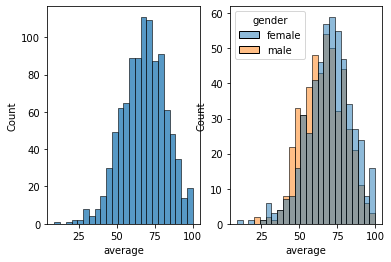

In [35]:
plt.subplot(121)
sns.histplot(x="average",data=df)
plt.subplot(122)
sns.histplot(x="average",data=df,hue="gender")

**Insights**
- Female students tend to perform well then male students.

<AxesSubplot:xlabel='total_score', ylabel='Count'>

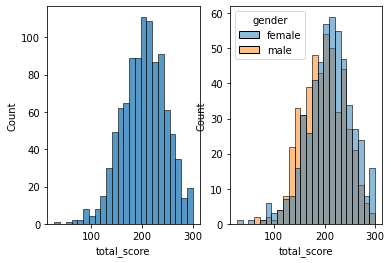

In [36]:
plt.subplot(121)
sns.histplot(x="total_score",data=df)
plt.subplot(122)
sns.histplot(x="total_score",data=df,hue="gender")

**Insights**
- Female students tend to perform well then male students.

<AxesSubplot:xlabel='average', ylabel='Count'>

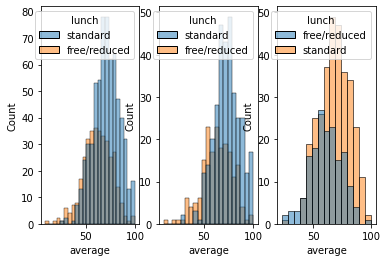

In [37]:
plt.subplot(131)
sns.histplot(x="average",data=df,hue="lunch")
plt.subplot(132)
sns.histplot(x="average",data=df[df["gender"]=="female"],hue="lunch")
plt.subplot(133)
sns.histplot(x="average",data=df[df["gender"]=="male"],hue="lunch")

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

<AxesSubplot:xlabel='average', ylabel='Count'>

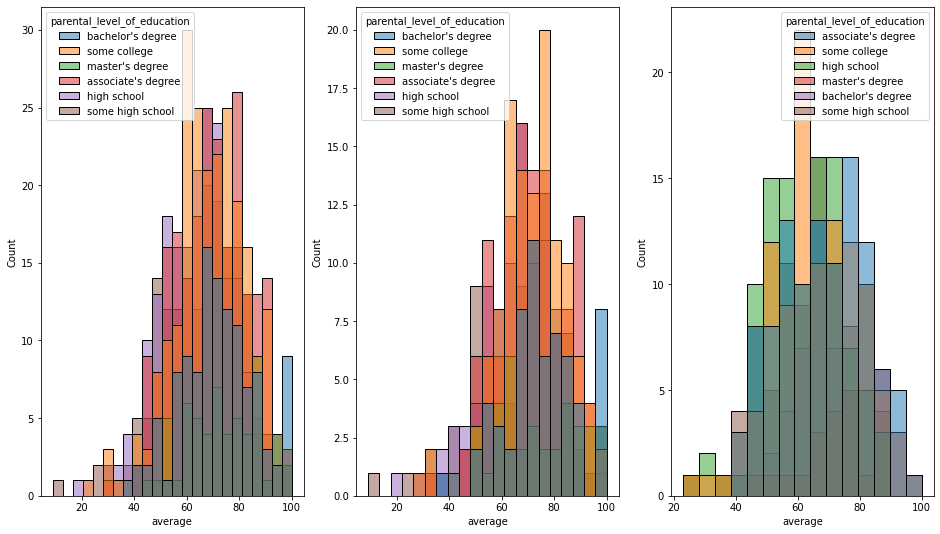

In [39]:
plt.figure(figsize=(16,9))
plt.subplot(131)
sns.histplot(x="average",data=df,hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(x="average",data=df[df["gender"]=="female"],hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(x="average",data=df[df["gender"]=="male"],hue="parental_level_of_education")

**Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

<AxesSubplot:xlabel='average', ylabel='Count'>

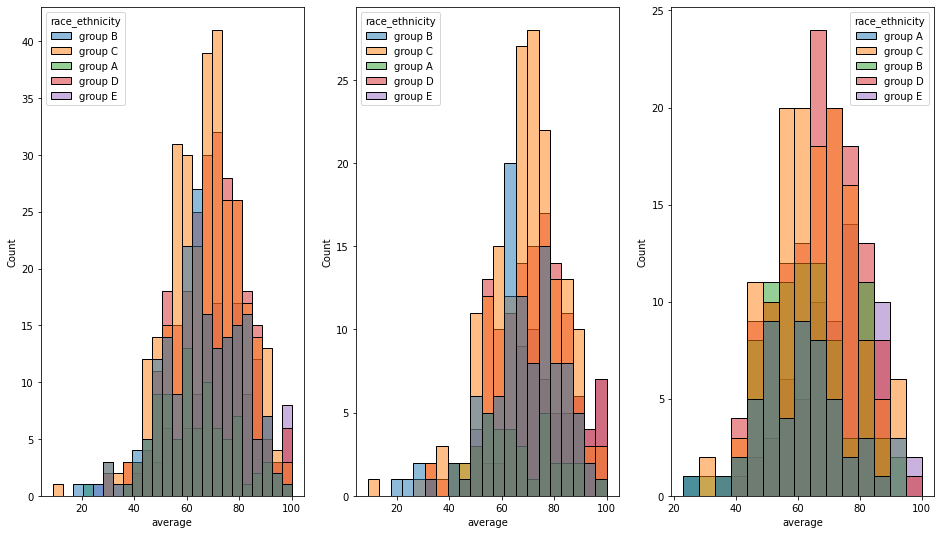

In [40]:
plt.figure(figsize=(16,9))
plt.subplot(131)
sns.histplot(x="average",data=df,hue="race_ethnicity")
plt.subplot(132)
sns.histplot(x="average",data=df[df["gender"]=="female"],hue="race_ethnicity")
plt.subplot(133)
sns.histplot(x="average",data=df[df["gender"]=="male"],hue="race_ethnicity")

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot:xlabel='writing_score'>

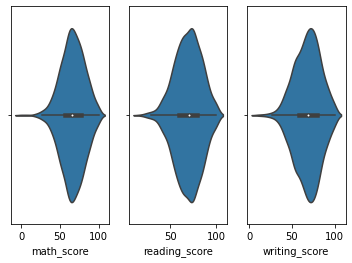

In [41]:
# Maximumum score of students in all three subjects
plt.subplot(131)
sns.violinplot(data=df,x="math_score")
plt.subplot(132)
sns.violinplot(data=df,x="reading_score")
plt.subplot(133)
sns.violinplot(data=df,x="writing_score")

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

<AxesSubplot:ylabel='test_preparation_course'>

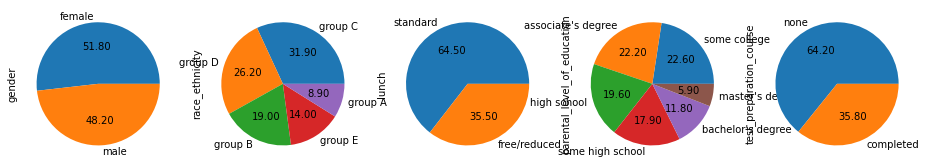

In [45]:
# Multivariate analysis using pieplot
plt.figure(figsize=(16,9))
plt.subplot(151)
df["gender"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(152)
df["race_ethnicity"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(153)
df["lunch"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(154)
df["parental_level_of_education"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(155)
df["test_preparation_course"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature Wise Visualization

### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

<AxesSubplot:ylabel='gender'>

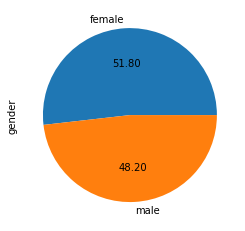

In [46]:
df["gender"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**
- Gender has balanced data with female students are 518 (51%) and male students are 482 (48%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [47]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


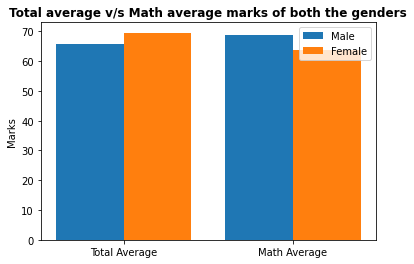

In [50]:
X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()

**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

<AxesSubplot:ylabel='race_ethnicity'>

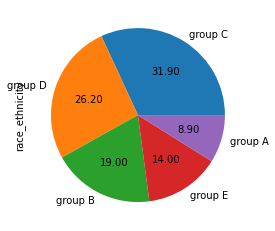

In [51]:
df["race_ethnicity"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

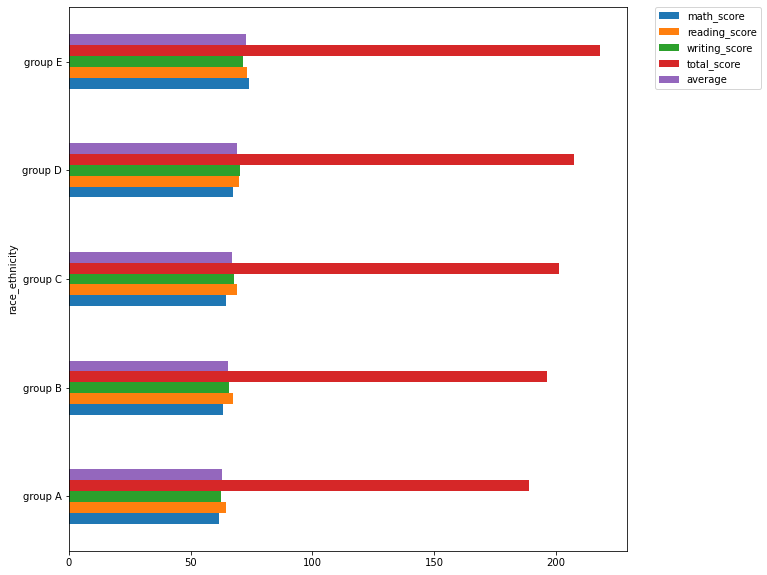

In [52]:
df.groupby('race_ethnicity').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

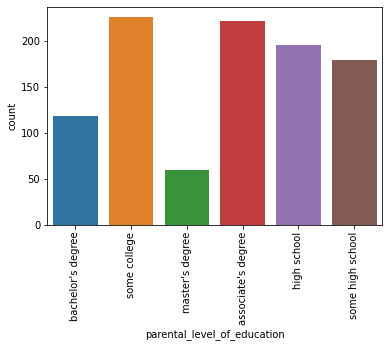

In [55]:
sns.countplot(x="parental_level_of_education",data=df)
plt.xticks(rotation=90)

**Insights**
- Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

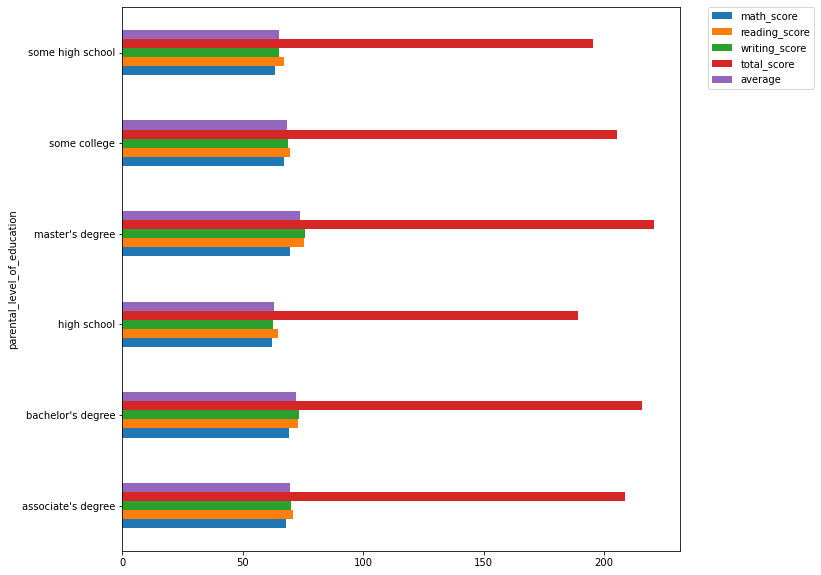

In [58]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

<AxesSubplot:xlabel='lunch', ylabel='count'>

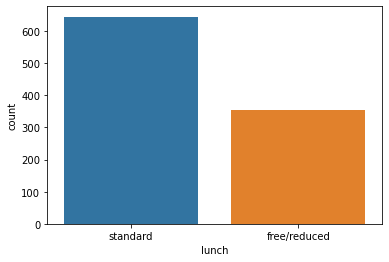

In [59]:
sns.countplot(df['lunch'])

**Insights**
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

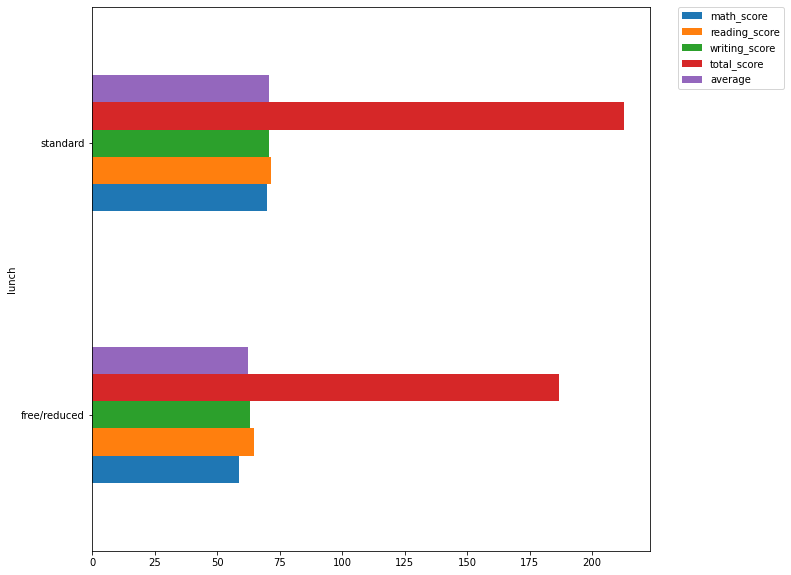

In [61]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

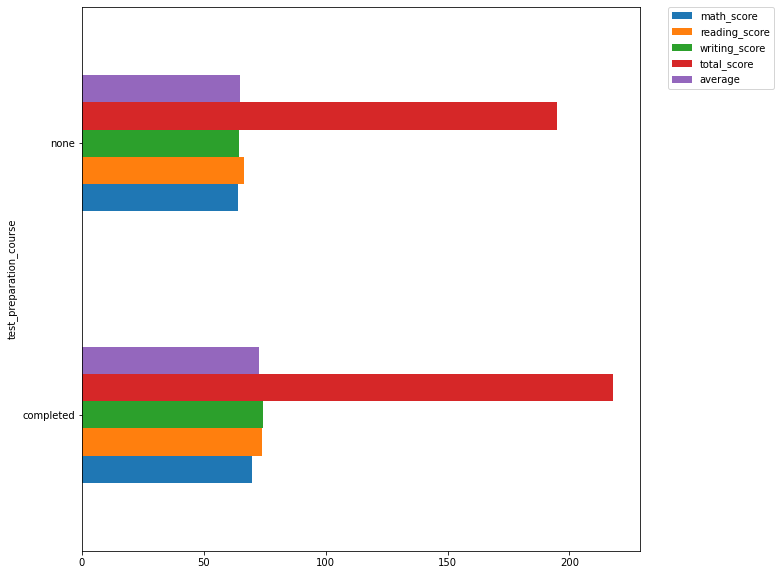

In [62]:
df.groupby('test_preparation_course').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

<AxesSubplot:xlabel='average'>

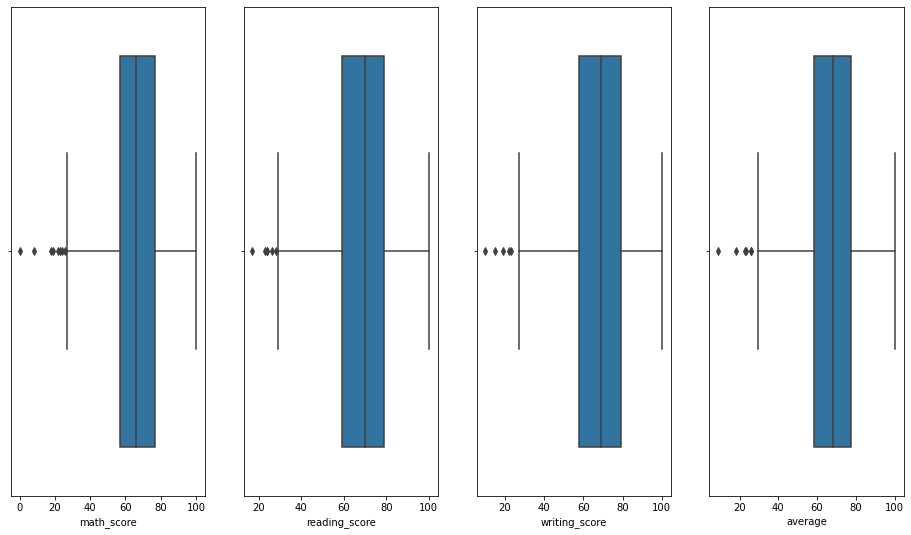

In [64]:
plt.figure(figsize=(16,9))
plt.subplot(141)
sns.boxplot(df["math_score"])
plt.subplot(142)
sns.boxplot(df["reading_score"])
plt.subplot(143)
sns.boxplot(df["writing_score"])
plt.subplot(144)
sns.boxplot(df["average"])

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

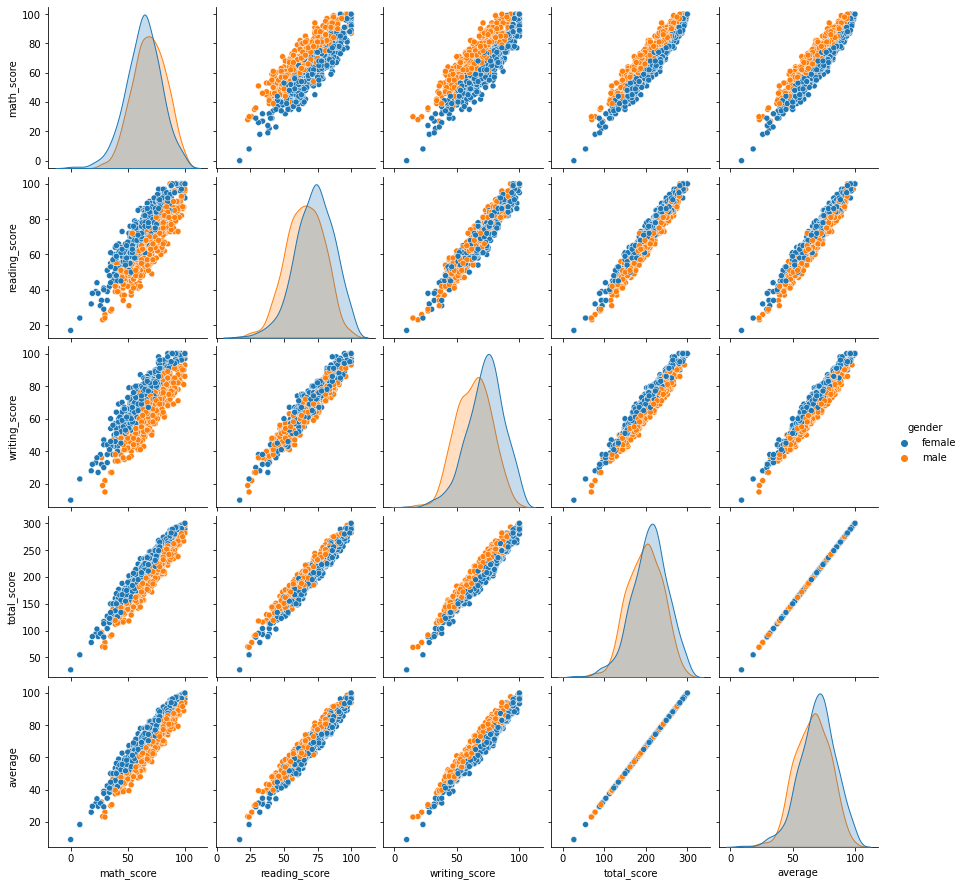

In [65]:
sns.pairplot(df,hue="gender")

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.